# Facial detection versus recognition, for beginners

<center>
    <img src='../data/rsc/disclosure.jpg' width='50%'>
</center>

## Imports

In [1]:
import cv2 # OpenCV, a major library of computer vision
import dlib # A C++ toolkit for making real world machine learning and data analysis (Cmake is required)
import numpy as np # Numpy, a major data processing library, it's partly made of C for great performances
import face_recognition # Basic face recognition library
import matplotlib.pyplot as plt # Matplotlib, great for simple plotting

### Requirements versions that made this notebook work

- opencv-python==4.10.0.84
- dlib==19.24.6
- numpy==2.1.1
- face-recognition==1.3.0
- face_recognition_models==0.3.0
- matplotlib:

### Codebase

Find the full code with data at this [github repository]()

## Face detection versus Face recognition

Face detection and face recognition are two distinct but related technologies, both playing a role in modern biometric systems. Let's break down what each term means, starting with face detection.

**Face Detection** refers to the <ins>ability of a system to locate and identify the presence of a human face</ins> within an image or video. It simply identifies that a face is present, without specifying whose face it is. For example, in modern digital cameras, face detection helps auto-focus on faces, ensuring clarity. Its role is limited to identifying that a human face exists in a given frame, but it does not involve determining the identity of the person.

**Face Recognition**, on the other hand, goes a step further. It not only detects a face but also <ins>matches the face to a stored database of faces to identify the individual</ins>. This technology is becoming widely adopted in various sectors, such as mobile phone authentication, airport security, and building access control. Facial recognition systems use unique biometric markers found in each face to verify or recognize the identity of a person.

The key difference between the two lies in their functions: face detection is simply about finding a face, while face recognition involves identifying who that face belongs to. While face detection is the starting point, face recognition adds the more complex task of identification, relying on comparison with a pre-existing database.

## Human face detection (using a pretrained model)

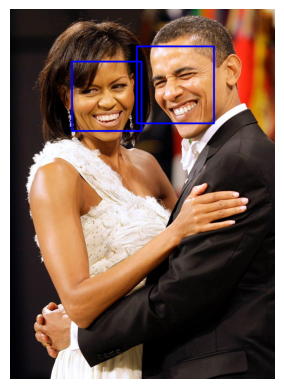

In [2]:
# Load an image
image = cv2.imread("../data/obamas/1.jpg")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the face detection model (pre-trained OpenCV model)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 4)

# Convert the image to RGB as OpenCV uses BGR by default
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with faces (bounding boxes)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

The model detected 2 faces but is not able to recognize who those 2 persons are.

This is where Face recognition comes in.

## Face recognition

### Facial landmarks

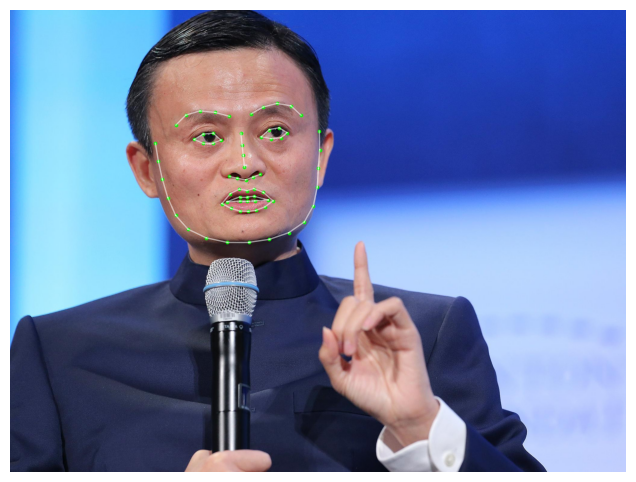

In [3]:
# Define connections between points to create edges
FACIAL_LANDMARKS_IDXS = {
    "jaw": (0, 17),
    "right_eyebrow": (17, 22),
    "left_eyebrow": (22, 27),
    "nose_bridge": (27, 31),
    "lower_nose": (31, 36),
    "right_eye": (36, 42),
    "left_eye": (42, 48),
    "outer_lips": (48, 60),
    "inner_lips": (60, 68),
}

# Load the pre-trained model
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../data/shape_predictor_68_face_landmarks.dat")

# Load an image
image = cv2.imread("../data/jack_ma/1.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = detector(gray_image)

# Prepare a list to store the landmarks
landmarks_list = []

# For each face detected, find the landmarks
for face in faces:
    landmarks = predictor(gray_image, face)
    landmarks_points = []
    
    # Store the 68 landmarks points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

    landmarks_list.append(landmarks_points)

# Convert image to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create the plot
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)

# Draw edges between landmarks
for landmarks in landmarks_list:
    for (start, end) in FACIAL_LANDMARKS_IDXS.values():
        # Draw edges between consecutive landmarks
        for i in range(start, end - 1):
            x1, y1 = landmarks[i]
            x2, y2 = landmarks[i + 1]
            plt.plot([x1, x2], [y1, y2], color=(1, 1, 1, 0.5), linewidth=1, zorder=2)
            
        # For circular regions (eyes, lips), connect the last point to the first
        if end in [42, 48, 60, 68]:  # Circular regions
            x1, y1 = landmarks[end - 1]
            x2, y2 = landmarks[start]
            plt.plot([x1, x2], [y1, y2], color=(1, 1, 1, 0.5), linewidth=1, zorder=1)

# Draw the landmarks (points) themselves
for landmarks in landmarks_list:
    for (x, y) in landmarks:
        plt.scatter(x, y, color=(0, 1, 0, 0.7), s=3, zorder=0.0)  # s is the size of the point

# Hide axes for a clean display
plt.axis("off")
plt.show()

[test](https://github.com/GuoQuanhao/68_points/blob/master/shape_predictor_68_face_landmarks.dat)

### Faces encodings

In [4]:
# Load the image and convert to RGB
image = cv2.imread("../data/malo/1.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract the face encodings from the image
face_encodings = face_recognition.face_encodings(image_rgb)

for encoding in face_encodings:
    print(encoding)

[-3.97105366e-02  3.17456536e-02 -1.74684078e-03 -1.50214195e-01
 -1.02466524e-01  5.08912243e-02 -3.97415832e-02 -5.14328368e-02
  8.11389312e-02 -1.37386590e-01  2.11047396e-01 -1.09904930e-02
 -2.19628587e-01 -1.10561542e-01  3.26251723e-02  1.13298722e-01
 -1.56874388e-01 -1.33582979e-01 -8.56866837e-02 -1.22430354e-01
 -2.50361469e-02  2.99267359e-02 -7.68955275e-02  8.54973793e-02
 -1.22967869e-01 -1.40972808e-01 -6.81633949e-02 -5.94073869e-02
  8.53759050e-02 -1.62173077e-01  9.60033312e-02  3.47595140e-02
 -1.06223106e-01  6.75373599e-02 -5.48590496e-02 -5.29735070e-03
 -6.91473261e-02 -9.25775617e-02  2.62648970e-01 -1.24640213e-02
 -1.52266011e-01  1.84412617e-02  2.69311160e-04  2.84918904e-01
  2.31496304e-01 -5.70195690e-02  2.40383111e-03 -1.07239531e-02
  1.86042950e-01 -2.67519444e-01  1.83355939e-02  1.73614204e-01
  6.48870170e-02  7.02599809e-02  1.85391437e-02 -1.23217024e-01
  1.23642292e-02  1.89617679e-01 -1.82717264e-01  1.07816786e-01
 -5.41070439e-02 -1.94556

Above vector is how the machine sees Obama's face.

In facial recognition, the face encoding is essentially a numerical representation of a person's facial features. This encoding is typically a 128-dimensional vector, where each number captures some unique aspect of the face. The key idea is that similar faces will produce similar encodings, allowing us to compare them.

### Face recognition

In [5]:
# Load multiple face images and create a database of encodings

## Michelle Obama
image_of_michelle_obama = face_recognition.load_image_file("../data/michelle_obama/2.jpg")
encoding_of_michelle_obama = face_recognition.face_encodings(image_of_michelle_obama)[0]
## Barack Obama
image_of_barack_obama = face_recognition.load_image_file("../data/barack_obama/1.jpg")
encoding_of_barack_obama = face_recognition.face_encodings(image_of_barack_obama)[0]
## Jack Ma
image_of_jack_ma = face_recognition.load_image_file("../data/jack_ma/1.jpg")
encoding_of_jack_ma = face_recognition.face_encodings(image_of_jack_ma)[0]
print(encoding_of_jack_ma)

known_face_encodings = [encoding_of_michelle_obama, encoding_of_barack_obama, encoding_of_jack_ma]
known_face_names = ["Michelle Obama", "Barack Obama", "Jack Ma"]

[-8.50775018e-02  5.53281903e-02  5.02630952e-04 -5.79925179e-02
 -4.91358154e-02 -7.03524947e-02 -1.07892929e-02 -1.32396758e-01
  1.15571216e-01 -9.03202519e-02  1.84759140e-01 -1.17896078e-02
 -1.99728116e-01 -9.71006453e-02  3.59073542e-02  1.40259311e-01
 -1.99471906e-01 -2.36310378e-01 -5.92064820e-02 -4.02879380e-02
  7.42720366e-02 -6.80080280e-02  2.46535230e-04 -2.81467550e-02
 -7.92707205e-02 -2.65029937e-01 -1.49902284e-01 -3.79495323e-02
  7.86659271e-02  3.92089412e-02  5.35989255e-02  2.91215512e-03
 -2.20442444e-01 -8.97635445e-02  6.99407756e-02  5.82170263e-02
 -5.45785879e-04 -8.59169513e-02  2.22402483e-01 -3.64085543e-03
 -1.70671001e-01  1.85361132e-02  3.53237167e-02  2.56708384e-01
  1.65847421e-01  1.16079533e-03  6.01529554e-02 -1.09250329e-01
  6.65326789e-02 -1.32272869e-01  2.43428964e-02  1.80561289e-01
  9.23131481e-02  1.00373372e-01 -2.95559093e-02 -1.38471365e-01
  1.07598424e-01  1.06388241e-01 -2.00861871e-01 -4.18207385e-02
  1.06024206e-01 -6.97680

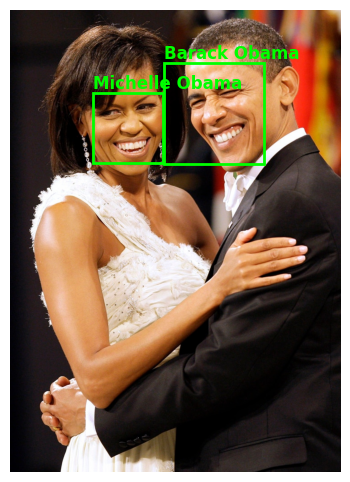

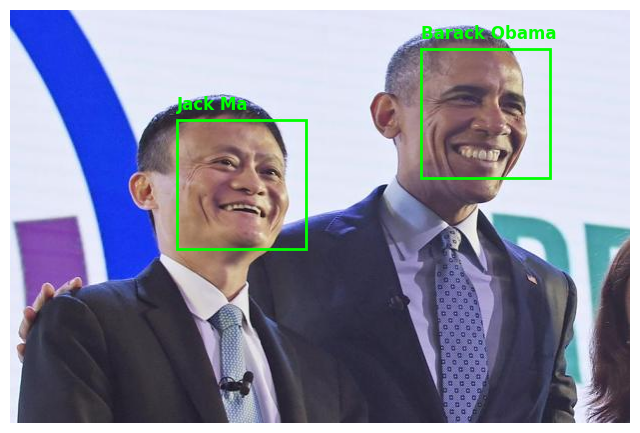

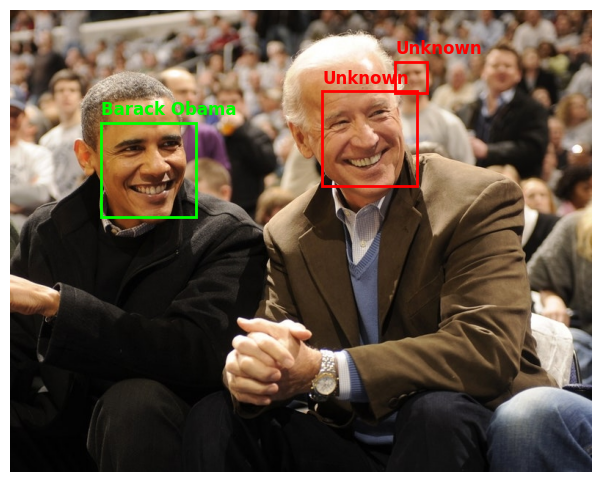

In [6]:
michelle_and_barack = face_recognition.load_image_file("../data/obamas/1.jpg")
jack_and_barack = face_recognition.load_image_file("../data/ma_obama/1.jpg")
biden_and_barack = face_recognition.load_image_file("../data/biden_obama/1.jpg")

test_images = [michelle_and_barack, jack_and_barack, biden_and_barack]

for image in test_images:
    # Detect face locations and encodings
    face_locations = face_recognition.face_locations(image)
    new_face_encodings = face_recognition.face_encodings(image, face_locations)
    
    # Plotting the image using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image)

    # Loop through each detected face and its encoding
    for i, new_encoding in enumerate(new_face_encodings):
        # Get the face location
        top, right, bottom, left = face_locations[i]

        # Compare with known faces
        matches = face_recognition.compare_faces(known_face_encodings, new_encoding)
        face_distances = face_recognition.face_distance(known_face_encodings, new_encoding)

        # Find the best match
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
            bbox_color = (0,1,0)  # Green for identified faces
        else:
            name = "Unknown"
            bbox_color = (1,0,0)  # Red for unknown faces

        # Draw a rectangle around the face
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color=bbox_color, linewidth=2)
        plt.gca().add_patch(rect)

        # Add the name annotation
        plt.text(left, top - 10, name, color=bbox_color, fontsize=12, weight="bold")
    
    # Show the image with annotations
    plt.axis("off")
    plt.show()

Well... it looks like this famous person is unknown to our small database. This is all good since we haven't added Joe Biden to it.

There is another detected face in the background, which shows how efficient current model can be.

# Limitations to basic facial recognition

<center>
    <img src='../data/rsc/face_recognition.gif' width='50%' alt='A GIF from the face_recognition library documentation showing 2 recognized people. One of them is showing an image of Barack Obama onto a phone screen, Barack Obama is also recognised even tho this is a flat picture of him'>
</center>

<center>Example from the face_recognition library, shows a limitation of basic recognition algorithms to persons inside images. Many recognition systems are exploitable to faking this way. It has for instance been the case for many facial recognition features on mobile phones before Apple's FaceID.</center>

<br><br>

Fortunately, there are now many solutions available to overcome these limitations. In this field, we talk about depth estimation or stereoscopic vision, for example.

Depth Estimation is the task of measuring the distance of each pixel relative to the camera. Depth is extracted from either monocular (single) or stereo (multiple views of a scene) images. Traditional methods use multi-view geometry to find the relationship between the images. Newer methods can directly estimate depth by minimizing the regression loss, or by learning to generate a novel view from a sequence. The most popular benchmarks are [KITTI](https://www.cvlibs.net/datasets/kitti/) and [NYUv2](https://paperswithcode.com/sota/monocular-depth-estimation-on-nyu-depth-v2).

Thanks to depth estimation techniques, it becomes possible to detect fraudulent attempts using flat facial images.
Here are some of the most commonly used depth estimation techniques aimed at identifying genuine human faces and avoiding imitations.

1. **Stereo Vision Systems**: This method uses stereo cameras, like OAK-D devices, to capture two slightly offset images, generating a disparity map that calculates depth throughout the scene. By interpreting this depth information, these systems differentiate real 3D faces from flat 2D images. DepthAI and similar platforms utilize these techniques to run depth-based classifiers effectively and detect spoofing attempts.

2. **Monocular Depth Estimation with Deep Learning**: For setups without stereo or dedicated depth sensors, monocular depth estimation is gaining traction. It uses a single RGB camera combined with deep learning models, such as Fully Convolutional Networks (FCNs) or CNNs, to derive depth data from one image. This approach often incorporates facial landmark extraction to build a depth profile, aiding in distinguishing between real and fake faces.

3. **Hypergraph Convolutional Networks (HGCNN)**: This advanced method models relationships between facial landmarks using hypergraphs in RGB and depth images. By constructing a hypergraph, the system learns depth and texture features simultaneously, enhancing its ability to identify irregularities linked to 2D attacks.

4. **Structured Light and Time-of-Flight Cameras**: These technologies measure depth by projecting light patterns onto a face (structured light) or timing the light’s return journey (time-of-flight). While highly effective, they require specialized hardware, which may not always be feasible for all applications.

5. **Combining Image Quality and Depth Analysis**: Systems like the Face Anti-Spoofing System (FASS) merge image quality metrics (such as texture and lighting consistency) with depth data. This combination improves the accuracy of detecting various spoofing methods, including masks, printed photos, and video replays.


Also, in 2024, Meta's research teams published a paper and the code for a rather impressive family of vision models that could be used for detecting fakes. The project is called [Sapiens: Foundation for Human Vision Models](https://about.meta.com/realitylabs/codecavatars/sapiens/).

## Sources
- [Introduction image](https://www.festground.com/articles/disclosure-comeback-tondo-ecstasy/315)
- [Gif from limitations](https://pypi.org/project/face-recognition/)
- [Anti Spoofing Face Recognition System using OAK-D and DepthAI](https://learnopencv.com/anti-spoofing-face-recognition-system-using-oak-d-and-depthai/)
- [Exploring Hypergraph Representation on Face Anti-spoofing Beyond 2D Attacks](https://ar5iv.labs.arxiv.org/html/1811.11594)
- [FASS: Face Anti-Spoofing System Using Image Quality Features and Deep Learning](https://www.mdpi.com/2079-9292/12/10/2199)